
Training network with 8 hidden neurons:
Epoch 0, Error: 67.498563
Epoch 3000, Error: 25.618183
Epoch 6000, Error: 7.440292
Epoch 9000, Error: 7.348182
Epoch 12000, Error: 7.320145
Epoch 15000, Error: 7.306620
Epoch 18000, Error: 7.298642
Epoch 21000, Error: 7.293348
Epoch 24000, Error: 7.289532
Epoch 27000, Error: 7.286578
Predictions: [1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 

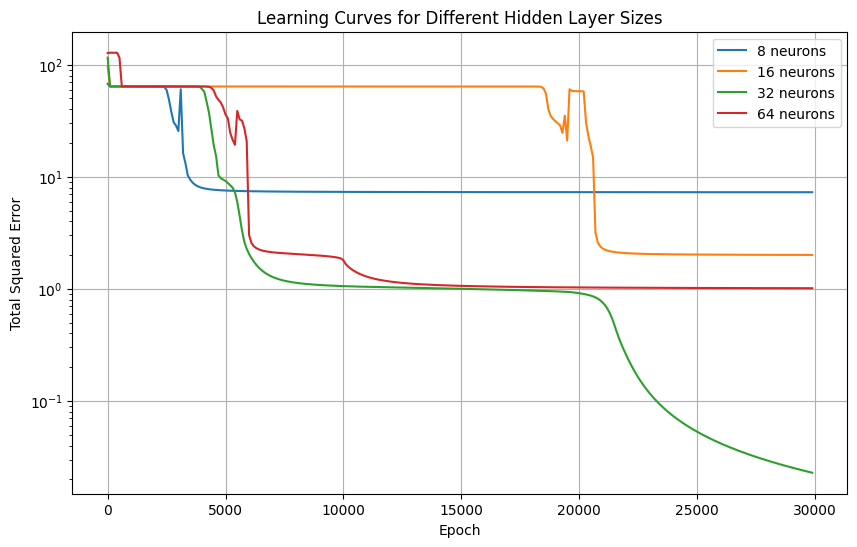

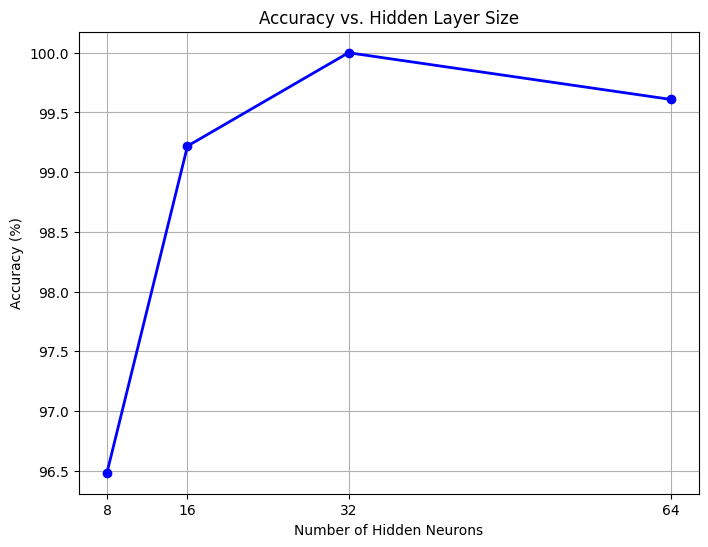

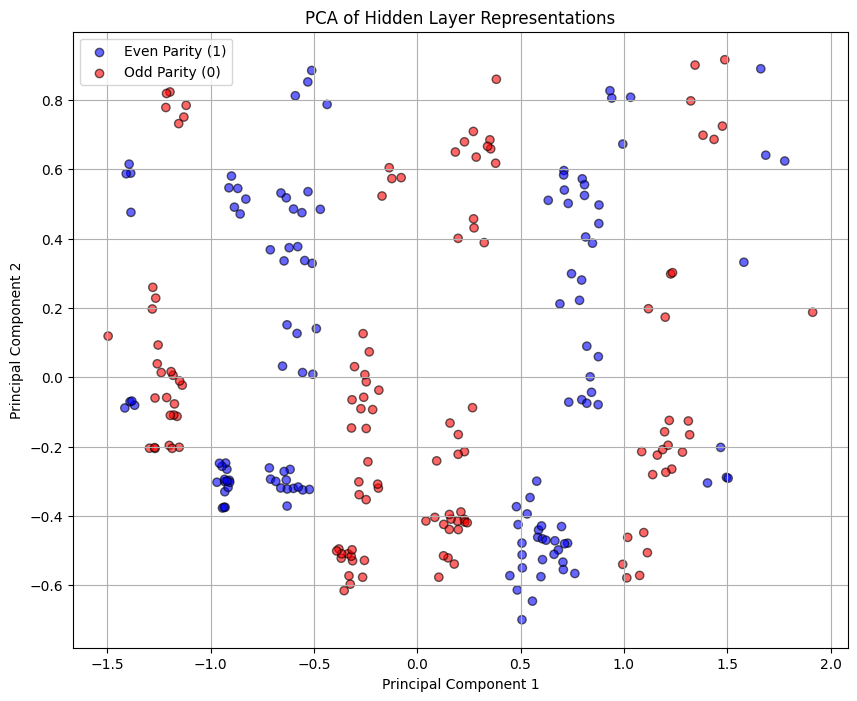

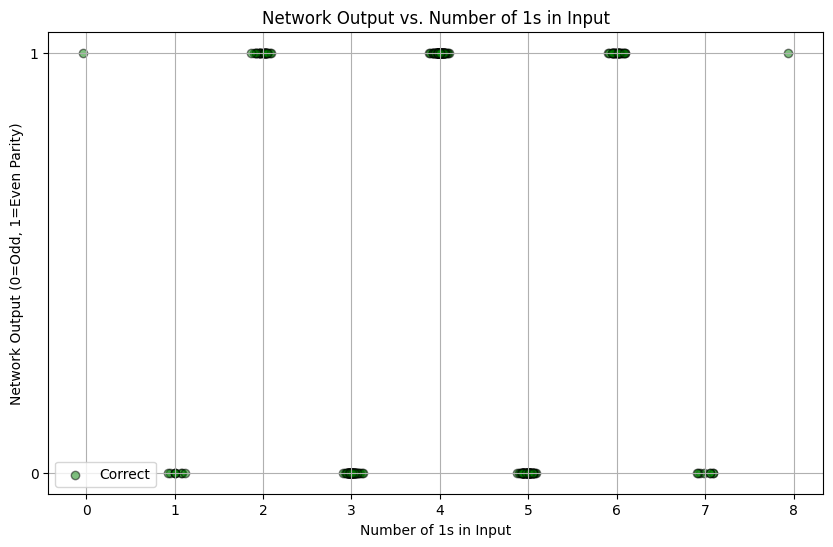


Best model had 32 hidden neurons with  100.00% accuracy


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Generate all 256 combinations of 8-bit inputs, plus a dummy input (-1)
def generate_parity_data(bits=8):
    x = []
    y = []
    for i in range(2 ** bits):
        bit_list = [int(b) for b in format(i, f'0{bits}b')]
        parity = sum(bit_list) % 2
        output = 1 if parity == 0 else 0    # Even parity = 1, else 0
        x.append(bit_list + [-1])   # Append dummy input -1
        y.append([output])
    return np.array(x), np.array(y)

# Train the BP network
def train_bp(x_train, y_train, hidden_size, epochs=30000, learning_rate=0.1):
    input_size = x_train.shape[1]   # 9 (8-bit + dummy input)
    output_size = y_train.shape[1]  # 1

    np.random.seed(42)
    weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
    weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))
    
    # For visualization
    error_history = []
    hidden_activations_final = None
    
    for epoch in range(epochs):
        # forward propagation
        hidden_input = np.dot(x_train, weights_input_hidden)
        hidden_output = sigmoid(hidden_input)
        final_input = np.dot(hidden_output, weights_hidden_output)
        final_output = sigmoid(final_input)
    
        # Save final hidden layer activations
        if epoch == epochs - 1:
            hidden_activations_final = hidden_output.copy()
    
        # Error calculation
        error = y_train - final_output
        total_error = np.sum(error ** 2)
        error_history.append(total_error)
    
        # Backpropagation
        d_output = error * sigmoid_derivative(final_output)
        d_hidden = d_output.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_output)
    
        # Update weights
        weights_hidden_output += hidden_output.T.dot(d_output) * learning_rate
        weights_input_hidden += x_train.T.dot(d_hidden) * learning_rate
    
        # Optionally print error every 2000 epochs
        if epoch % 3000 == 0:
            print(f"Epoch {epoch}, Error: {total_error:.6f}")
    
    return weights_input_hidden, weights_hidden_output, error_history, hidden_activations_final

# Evaluate the trained network
def evaluate(x_test, y_test, weights_input_hidden, weights_hidden_output):
    hidden = sigmoid(np.dot(x_test, weights_input_hidden))
    output = sigmoid(np.dot(hidden, weights_hidden_output))
    prediction = [1 if o >= 0.5 else 0 for o in output]
    accuracy = sum(int(prediction[i] == y_test[i][0]) for i in range(len(y_test))) / len(y_test)
    return prediction, accuracy, hidden, output

# Visualization functions
def plot_learning_curves(error_histories, hidden_sizes):
    plt.figure(figsize=(10, 6))
    for i, errors in enumerate(error_histories):
        # Plot every 100th point to avoid overcrowding
        plt.plot(range(0, len(errors), 100), errors[::100], label=f'{hidden_sizes[i]} neurons')
    
    plt.title('Learning Curves for Different Hidden Layer Sizes')
    plt.xlabel('Epoch')
    plt.ylabel('Total Squared Error')
    plt.legend()
    plt.grid(True)
    plt.yscale('log')  # Log scale for better visualization
    plt.savefig('parity_learning_curves.png')
    plt.show()

def plot_accuracy_vs_hidden_size(accuracies, hidden_sizes):
    plt.figure(figsize=(8, 6))
    plt.plot(hidden_sizes, accuracies, 'bo-', linewidth=2)
    plt.title('Accuracy vs. Hidden Layer Size')
    plt.xlabel('Number of Hidden Neurons')
    plt.ylabel('Accuracy (%)')
    plt.grid(True)
    plt.xticks(hidden_sizes)
    plt.savefig('parity_accuracy_vs_hidden.png')
    plt.show()

def plot_hidden_activations(hidden_activations, y_train):
    # PCA to reduce dimensionality for visualization
    pca = PCA(n_components=2)
    hidden_2d = pca.fit_transform(hidden_activations)
    
    plt.figure(figsize=(10, 8))
    # Color by actual class (even/odd parity)
    colors = ['red' if y == 0 else 'blue' for y in y_train.flatten()]
    
    plt.scatter(hidden_2d[:, 0], hidden_2d[:, 1], c=colors, alpha=0.6, edgecolor='k')
    plt.title('PCA of Hidden Layer Representations')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    
    # Add a legend
    plt.scatter([], [], c='blue', alpha=0.6, edgecolor='k', label='Even Parity (1)')
    plt.scatter([], [], c='red', alpha=0.6, edgecolor='k', label='Odd Parity (0)')
    plt.legend()
    
    plt.savefig('parity_hidden_pca.png')
    plt.show()

def plot_bit_count_vs_output(x_data, network_outputs, y_data):
    # Count number of 1s in each input
    bit_counts = np.sum(x_data[:, :-1], axis=1)  # Exclude bias term
    
    plt.figure(figsize=(10, 6))
    
    # Add slight jitter to avoid overlap
    jitter = np.random.normal(0, 0.05, size=len(bit_counts))
    
    # Get predictions (0 or 1)
    predictions = [1 if o >= 0.5 else 0 for o in network_outputs.flatten()]
    
    # Plot correct predictions
    correct_indices = [i for i in range(len(y_data)) if predictions[i] == y_data[i][0]]
    incorrect_indices = [i for i in range(len(y_data)) if predictions[i] != y_data[i][0]]
    
    plt.scatter(bit_counts[correct_indices] + jitter[correct_indices], 
                [predictions[i] for i in correct_indices], 
                alpha=0.5, c='green', edgecolor='k', label='Correct')
    
    # Plot incorrect predictions if any
    if incorrect_indices:
        plt.scatter(bit_counts[incorrect_indices] + jitter[incorrect_indices], 
                    [predictions[i] for i in incorrect_indices], 
                    alpha=0.5, c='red', edgecolor='k', label='Incorrect')
    
    plt.title('Network Output vs. Number of 1s in Input')
    plt.xlabel('Number of 1s in Input')
    plt.ylabel('Network Output (0=Odd, 1=Even Parity)')
    plt.yticks([0, 1])
    plt.xticks(range(9))
    plt.grid(True)
    plt.legend()
    plt.savefig('parity_bit_count_vs_output.png')
    plt.show()

# Main program
if __name__ == "__main__":
    x_data, y_data = generate_parity_data(bits=8)
    
    hidden_sizes = [8, 16, 32, 64]
    error_histories = []
    accuracies = []
    best_accuracy = 0
    best_hidden_size = 0
    best_hidden_activations = None
    best_outputs = None
    
    for hidden_neurons in hidden_sizes:
        print(f"\nTraining network with {hidden_neurons} hidden neurons:")
        w_ih, w_ho, error_history, hidden_activations = train_bp(x_data, y_data, hidden_size=hidden_neurons)
        predictions, acc, hidden, outputs = evaluate(x_data, y_data, w_ih, w_ho)
        print(f"Predictions: {predictions}")
        print(f"Accuracy: {acc * 100:.2f}%")
        
        error_histories.append(error_history)
        accuracies.append(acc * 100)
        
        if acc > best_accuracy:
            best_accuracy = acc
            best_hidden_size = hidden_neurons
            best_hidden_activations = hidden_activations
            best_outputs = outputs
    
    # Generate essential visualizations
    print("\nGenerating visualizations...")
    
    # 1. Learning curves - shows training convergence for each network size
    plot_learning_curves(error_histories, hidden_sizes)
    
    # 2. Accuracy vs hidden size - shows relationship between network size and performance
    plot_accuracy_vs_hidden_size(accuracies, hidden_sizes)
    
    # 3. Hidden layer activations - shows how the network separates even/odd parity inputs
    plot_hidden_activations(best_hidden_activations, y_data)
    
    # 4. Bit count vs output - directly shows if the network learned the parity pattern
    plot_bit_count_vs_output(x_data, best_outputs, y_data)
    
    print(f"\nBest model had {best_hidden_size} hidden neurons with {best_accuracy * 100: .2f}% accuracy")
    
    input("\nPress ENTER to exit...")